## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE

import warnings

warnings.filterwarnings("ignore")

## Exploratory data analysis

In [36]:
df = pd.read_csv('creditcard.csv')
df = df.sample(frac=.1)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
68865,53171.0,1.223217,0.222542,0.638158,0.705527,-0.663761,-1.182059,0.065794,-0.217819,0.050099,...,-0.233734,-0.703320,0.172793,0.701665,0.164853,0.074184,-0.031211,0.023186,8.99,0
42104,40958.0,1.219951,0.601855,-0.355782,1.119915,0.236422,-0.687652,0.180151,-0.070483,-0.303253,...,-0.023024,-0.035009,-0.170997,-0.108150,0.701627,-0.324332,0.026978,0.037529,1.00,0
59176,48731.0,-0.355412,1.077136,1.227893,-0.235333,0.400244,-0.396604,0.746234,-0.057308,-0.455606,...,-0.273332,-0.685914,-0.131166,-0.453817,-0.055375,0.120595,0.268706,0.114251,4.49,0
224106,143655.0,-5.637588,-1.314069,0.057648,0.087205,-1.865742,-0.359914,-1.542476,1.842464,0.066925,...,0.269615,0.604253,-0.469779,0.230912,0.229838,0.612428,-1.435306,-0.487776,11.67,0
225444,144251.0,-1.929745,2.608816,-1.773227,-1.651902,0.898382,-1.274378,1.432486,-0.116311,0.593148,...,0.099593,0.935168,-0.204572,-0.372546,0.068906,0.084581,0.703807,0.392260,0.77,0


### <font color='red'>Due to lack system resources, couldn't run model training with full data as it is taking too much time. Sharing the result of model run with 10% of data.</font>
#### Sharing another notebook having result wih full data and models that got executed sucessfully

### Observe different feature type present in the data

In [37]:
# Shape of input data
print(f"Dataset dimension:- Rows = {df.shape[0]}, Columns = {df.shape[1]}")

Dataset dimension:- Rows = 28481, Columns = 31


In [38]:
# Check for missing values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28481 entries, 68865 to 106528
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    28481 non-null  float64
 1   V1      28481 non-null  float64
 2   V2      28481 non-null  float64
 3   V3      28481 non-null  float64
 4   V4      28481 non-null  float64
 5   V5      28481 non-null  float64
 6   V6      28481 non-null  float64
 7   V7      28481 non-null  float64
 8   V8      28481 non-null  float64
 9   V9      28481 non-null  float64
 10  V10     28481 non-null  float64
 11  V11     28481 non-null  float64
 12  V12     28481 non-null  float64
 13  V13     28481 non-null  float64
 14  V14     28481 non-null  float64
 15  V15     28481 non-null  float64
 16  V16     28481 non-null  float64
 17  V17     28481 non-null  float64
 18  V18     28481 non-null  float64
 19  V19     28481 non-null  float64
 20  V20     28481 non-null  float64
 21  V21     28481 non-null  float6

#### <font color='red'>Observation</font>: No missing values in the dataset as expected as the dataset is already normalized and reduced using PCA

Here we will observe the distribution of our classes

In [39]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

Text(0, 0.5, 'Count')

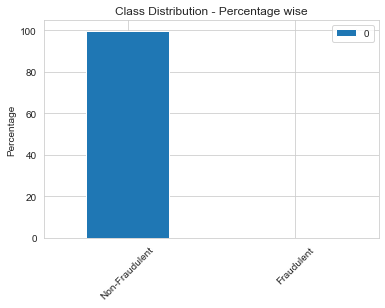

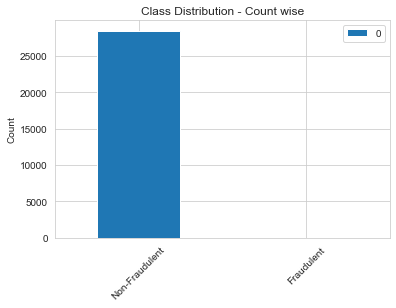

In [40]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
class_label = ["Non-Fraudulent", "Fraudulent"]

class_share = pd.DataFrame([normal_share, fraud_share])
class_share.plot(kind='bar')
plt.title("Class Distribution - Percentage wise")
plt.xticks(range(2), class_label, rotation=45)
plt.ylabel('Percentage')

class_count = pd.DataFrame([classes[0], classes[1]])
class_count.plot(kind='bar')
plt.title("Class Distribution - Count wise")
plt.xticks(range(2), class_label, rotation=45)
plt.ylabel('Count')

#### <font color='red'>Observation</font>: Fraudulent class data is very neglible compared to the non-fraudulent class data signifying we have a highly imbalanced data

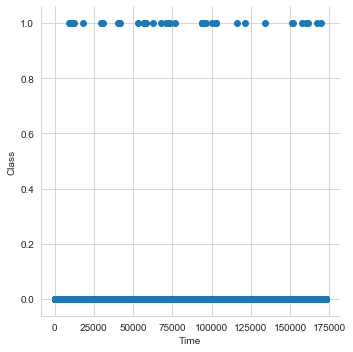

In [41]:
# Create a scatter plot to observe the distribution of classes with time
sns.set_style("whitegrid")
sns.FacetGrid(df, height = 5).map(plt.scatter, "Time", "Class")

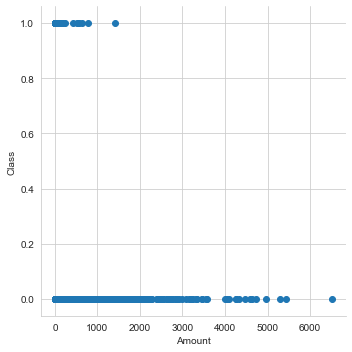

In [42]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.set_style("whitegrid")
sns.FacetGrid(df, height = 5).map(plt.scatter, "Amount", "Class")

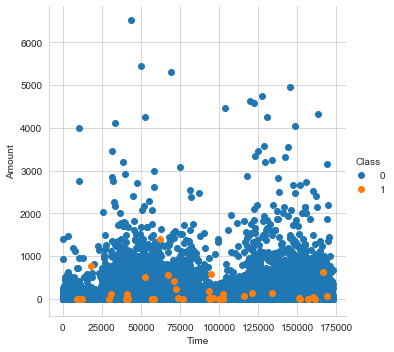

In [43]:
# Scatter plot of Time vs Amount
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", height = 5).map(plt.scatter, "Time", "Amount").add_legend()

#### <font color='red'>Observation</font>: Above 3 plots shows that the fraud transactions happened for mostly small amount and almost unformly over time.

#### Some More Analysis

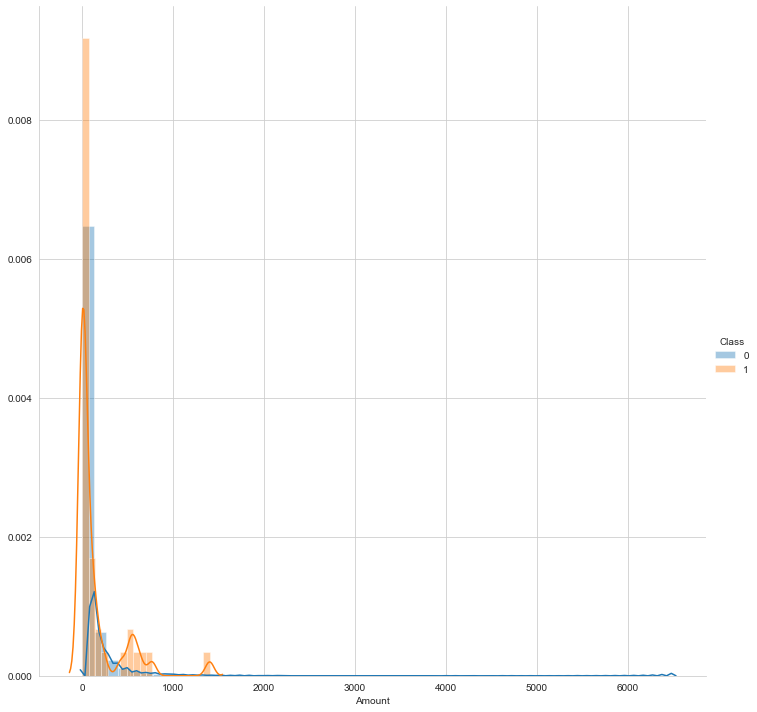

In [44]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", height=10).map(sns.distplot, "Amount").add_legend()
plt.show()

In [45]:
df[df["Class"] == 1].Amount.describe()

count      42.000000
mean      148.633571
std       283.269333
min         0.000000
25%         1.000000
50%        11.390000
75%       127.232500
max      1402.160000
Name: Amount, dtype: float64

In [46]:
df[df["Class"] == 0].Amount.describe()

count    28439.000000
mean        87.291250
std        228.065653
min          0.000000
25%          5.675000
50%         22.000000
75%         76.015000
max       6511.000000
Name: Amount, dtype: float64

#### <font color='red'>Observation</font>: All of the transactions for which fraud has happened, the trasaction value is less than 2500

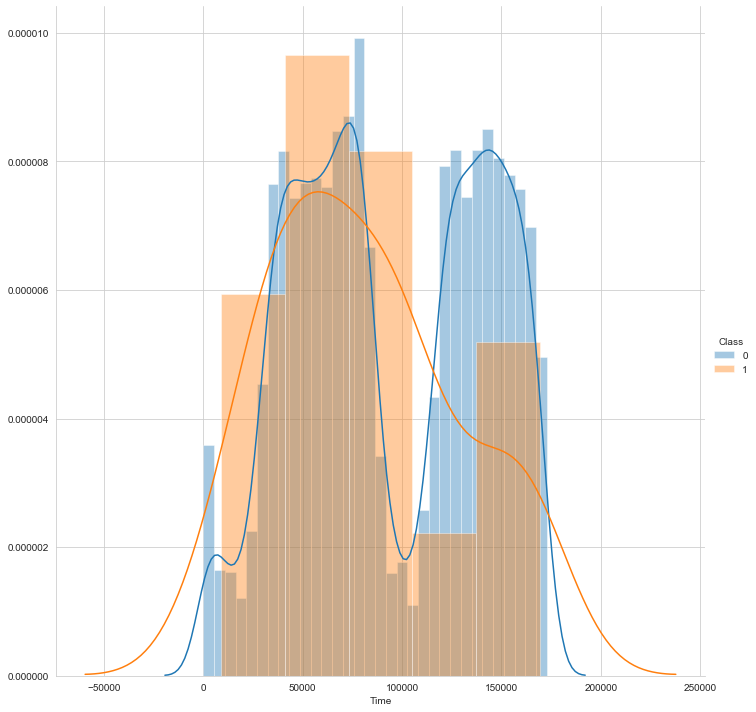

In [47]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", height=10).map(sns.distplot, "Time").add_legend()
plt.show()

#### <font color='red'>Observation</font>: Not much of conclusive information as we have seen earlier as well that fraudulent transactions happen unformly throughout the time

In [48]:
# Drop unnecessary columns
from sklearn.preprocessing import StandardScaler

# Normalize Amount
df['Amt_Normalized'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

# Remove "Time" and "Amount" columns as they will not be needed for modelling
curated_df1 = df.drop(['Time','Amount'],axis =1)
curated_df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amt_Normalized
68865,1.223217,0.222542,0.638158,0.705527,-0.663761,-1.182059,0.065794,-0.217819,0.050099,-0.064050,...,-0.233734,-0.703320,0.172793,0.701665,0.164853,0.074184,-0.031211,0.023186,0,-0.343584
42104,1.219951,0.601855,-0.355782,1.119915,0.236422,-0.687652,0.180151,-0.070483,-0.303253,-0.393414,...,-0.023024,-0.035009,-0.170997,-0.108150,0.701627,-0.324332,0.026978,0.037529,0,-0.378603
59176,-0.355412,1.077136,1.227893,-0.235333,0.400244,-0.396604,0.746234,-0.057308,-0.455606,-0.335013,...,-0.273332,-0.685914,-0.131166,-0.453817,-0.055375,0.120595,0.268706,0.114251,0,-0.363307
224106,-5.637588,-1.314069,0.057648,0.087205,-1.865742,-0.359914,-1.542476,1.842464,0.066925,-1.131624,...,0.269615,0.604253,-0.469779,0.230912,0.229838,0.612428,-1.435306,-0.487776,0,-0.331838
225444,-1.929745,2.608816,-1.773227,-1.651902,0.898382,-1.274378,1.432486,-0.116311,0.593148,1.908023,...,0.099593,0.935168,-0.204572,-0.372546,0.068906,0.084581,0.703807,0.392260,0,-0.379611


### Splitting the data into train & test data

In [49]:
y=curated_df1['Class']
X=curated_df1.drop(['Class'],axis=1)

In [50]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [51]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

42
29
13


### Plotting the distribution of a variable

In [52]:
# plot the histogram of variables from the dataset to see the skewness

In [53]:
PCA_Vs= ['V%i' % k for k in range(1,29)]

Text(0.5, 1.0, 'Histograms of the Features')

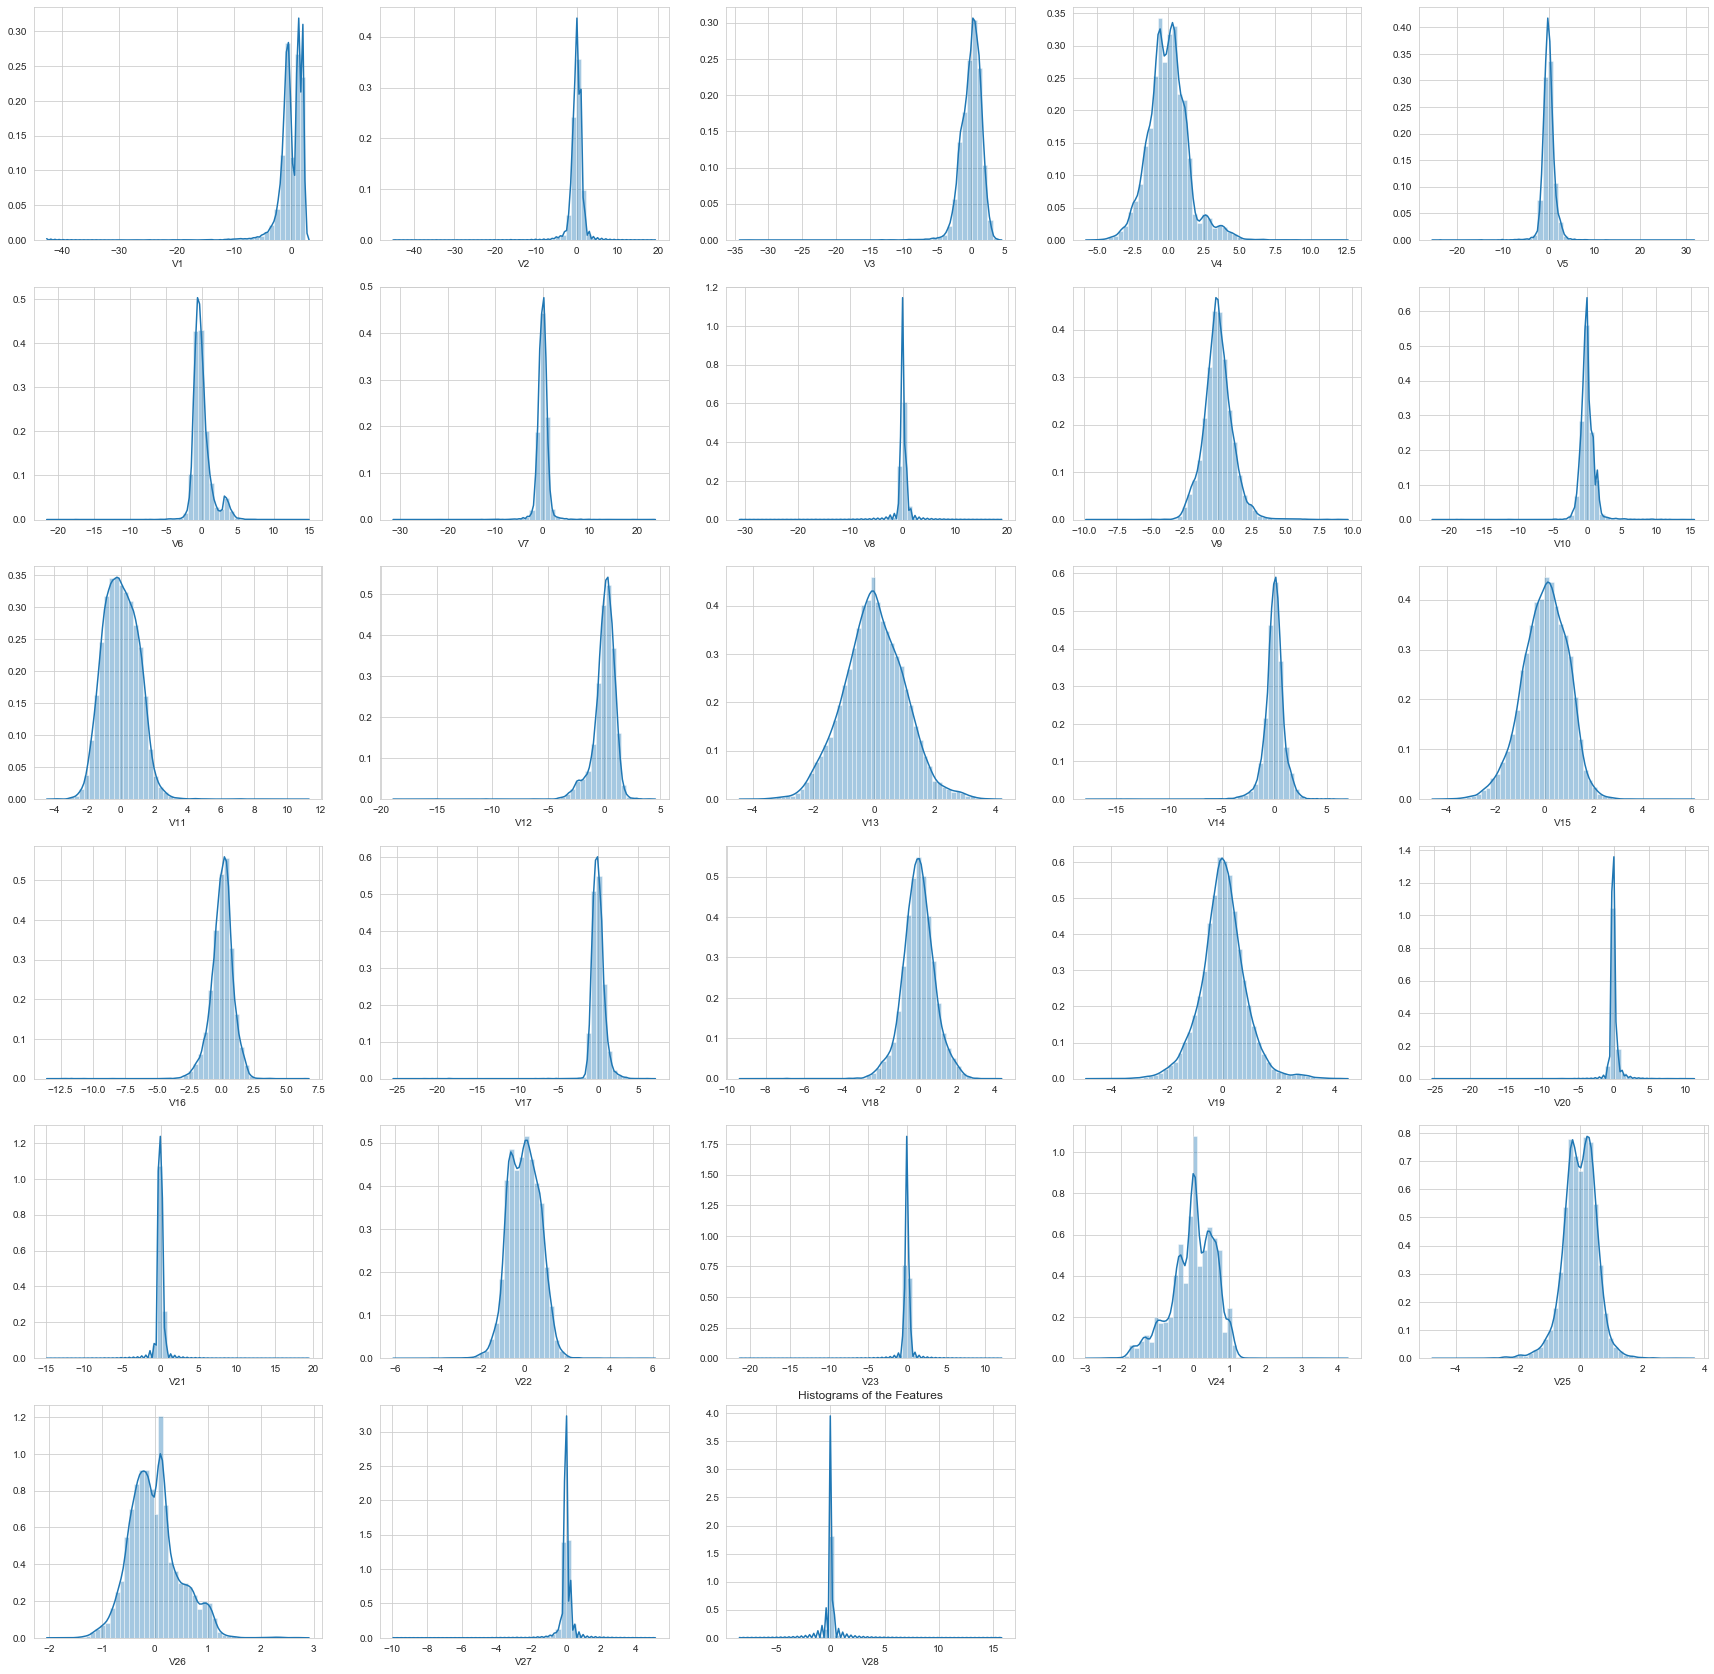

In [54]:
# Plot of X_train dataset
nrows=6
ncols=5
fig, ax = plt.subplots(figsize=(30,30))  
for i in range(len(PCA_Vs)):    
    sp=plt.subplot(nrows,ncols,i+1)
    sns.distplot(X_train[PCA_Vs[i]])
plt.title('Histograms of the Features')

Text(0.5, 1.0, 'Histograms of the Features')

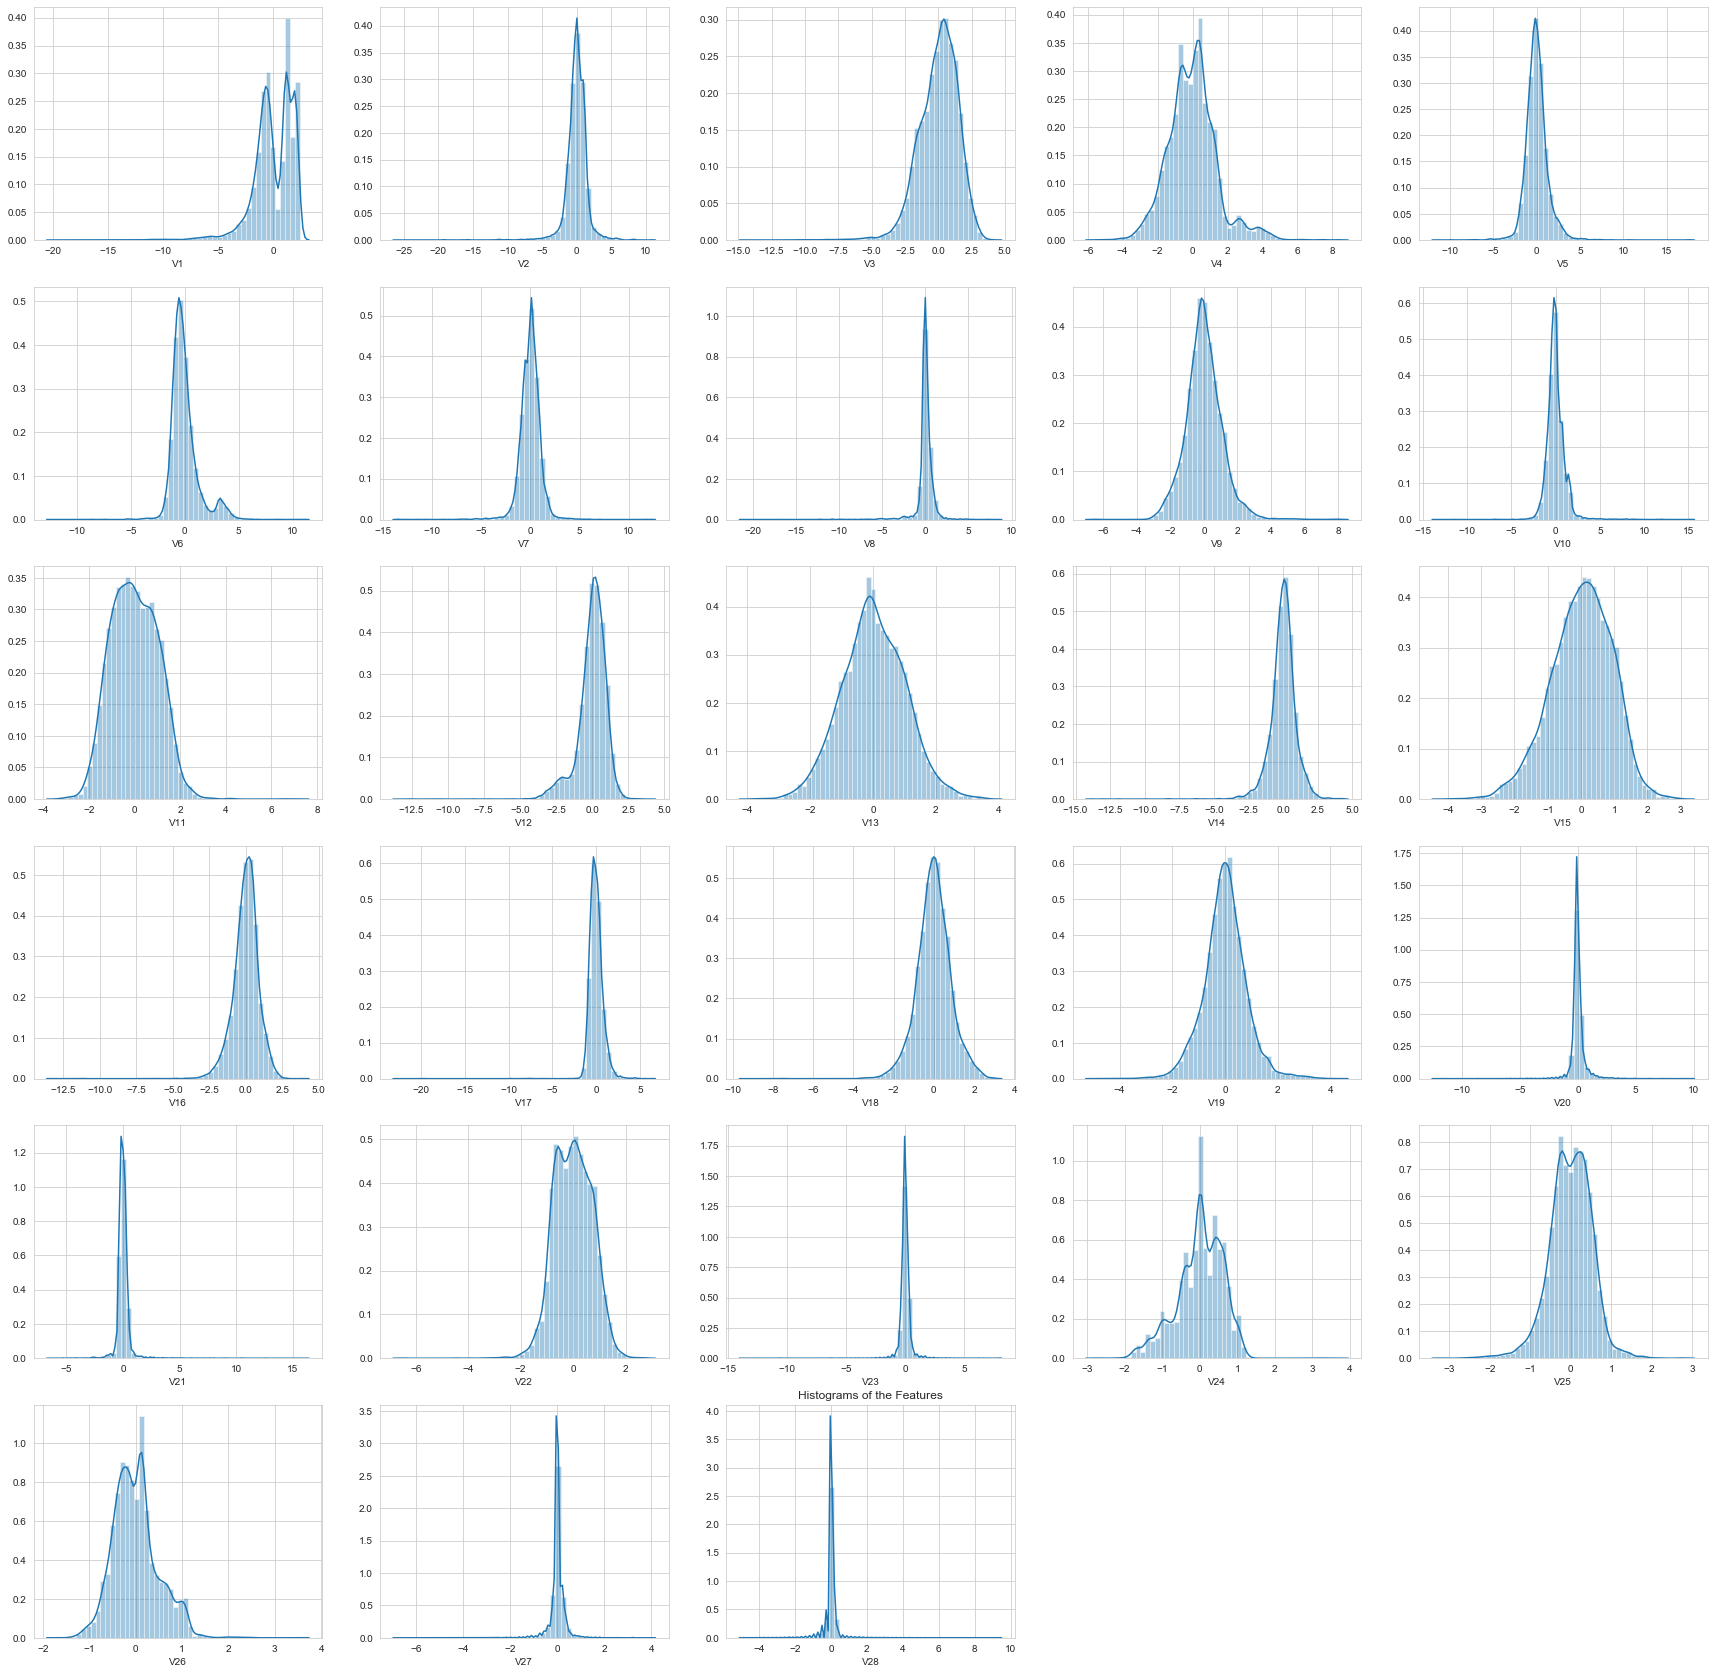

In [55]:
# Plot of X_test dataset
nrows=6
ncols=5
fig, ax = plt.subplots(figsize=(30,30))  
for i in range(len(PCA_Vs)):   
    sp=plt.subplot(nrows,ncols,i+1)
    sns.distplot(X_test[PCA_Vs[i]])
plt.title('Histograms of the Features')

#### <font color='red'>Observation</font>: There are skewness in some of the columns.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [56]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy=False)
columns = list(X_train.columns)
pt.fit(X_train)
X_train = pd.DataFrame(pt.transform(X_train), columns=columns)
X_test = pd.DataFrame(pt.transform(X_test), columns=columns)

In [57]:
# plot the histogram of a variable from the dataset again to see the result 

Text(0.5, 1.0, 'Histograms of the Features')

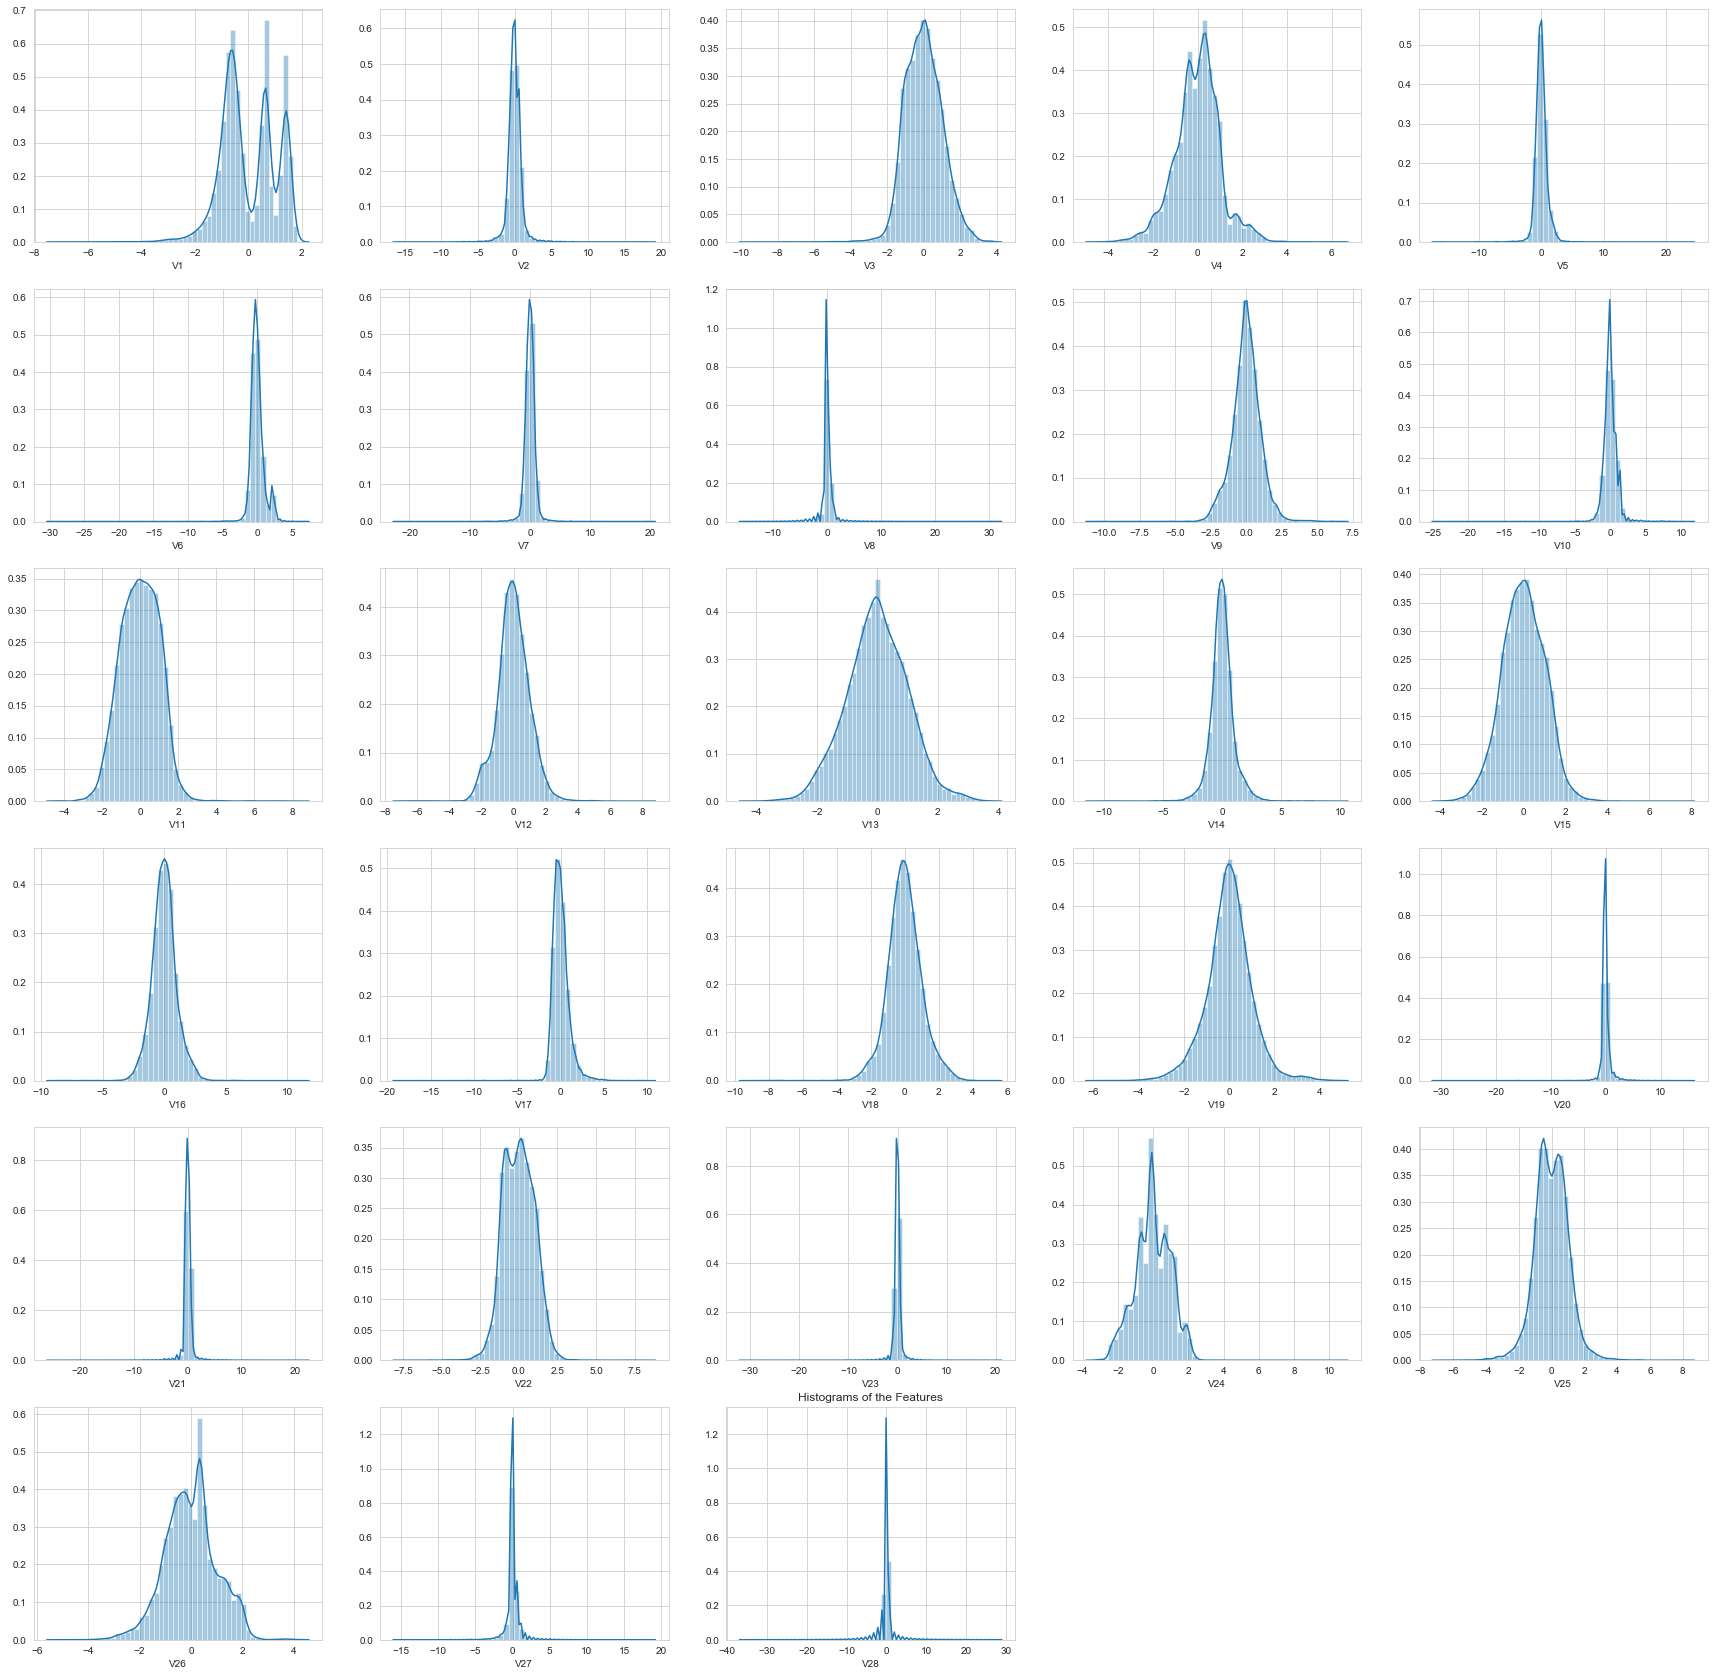

In [58]:
# Plot of X_train dataset
nrows=6
ncols=5
fig, ax = plt.subplots(figsize=(30,30))  
for i in range(len(PCA_Vs)):    
    sp=plt.subplot(nrows,ncols,i+1)
    sns.distplot(X_train[PCA_Vs[i]])
plt.title('Histograms of the Features')

Text(0.5, 1.0, 'Histograms of the Features')

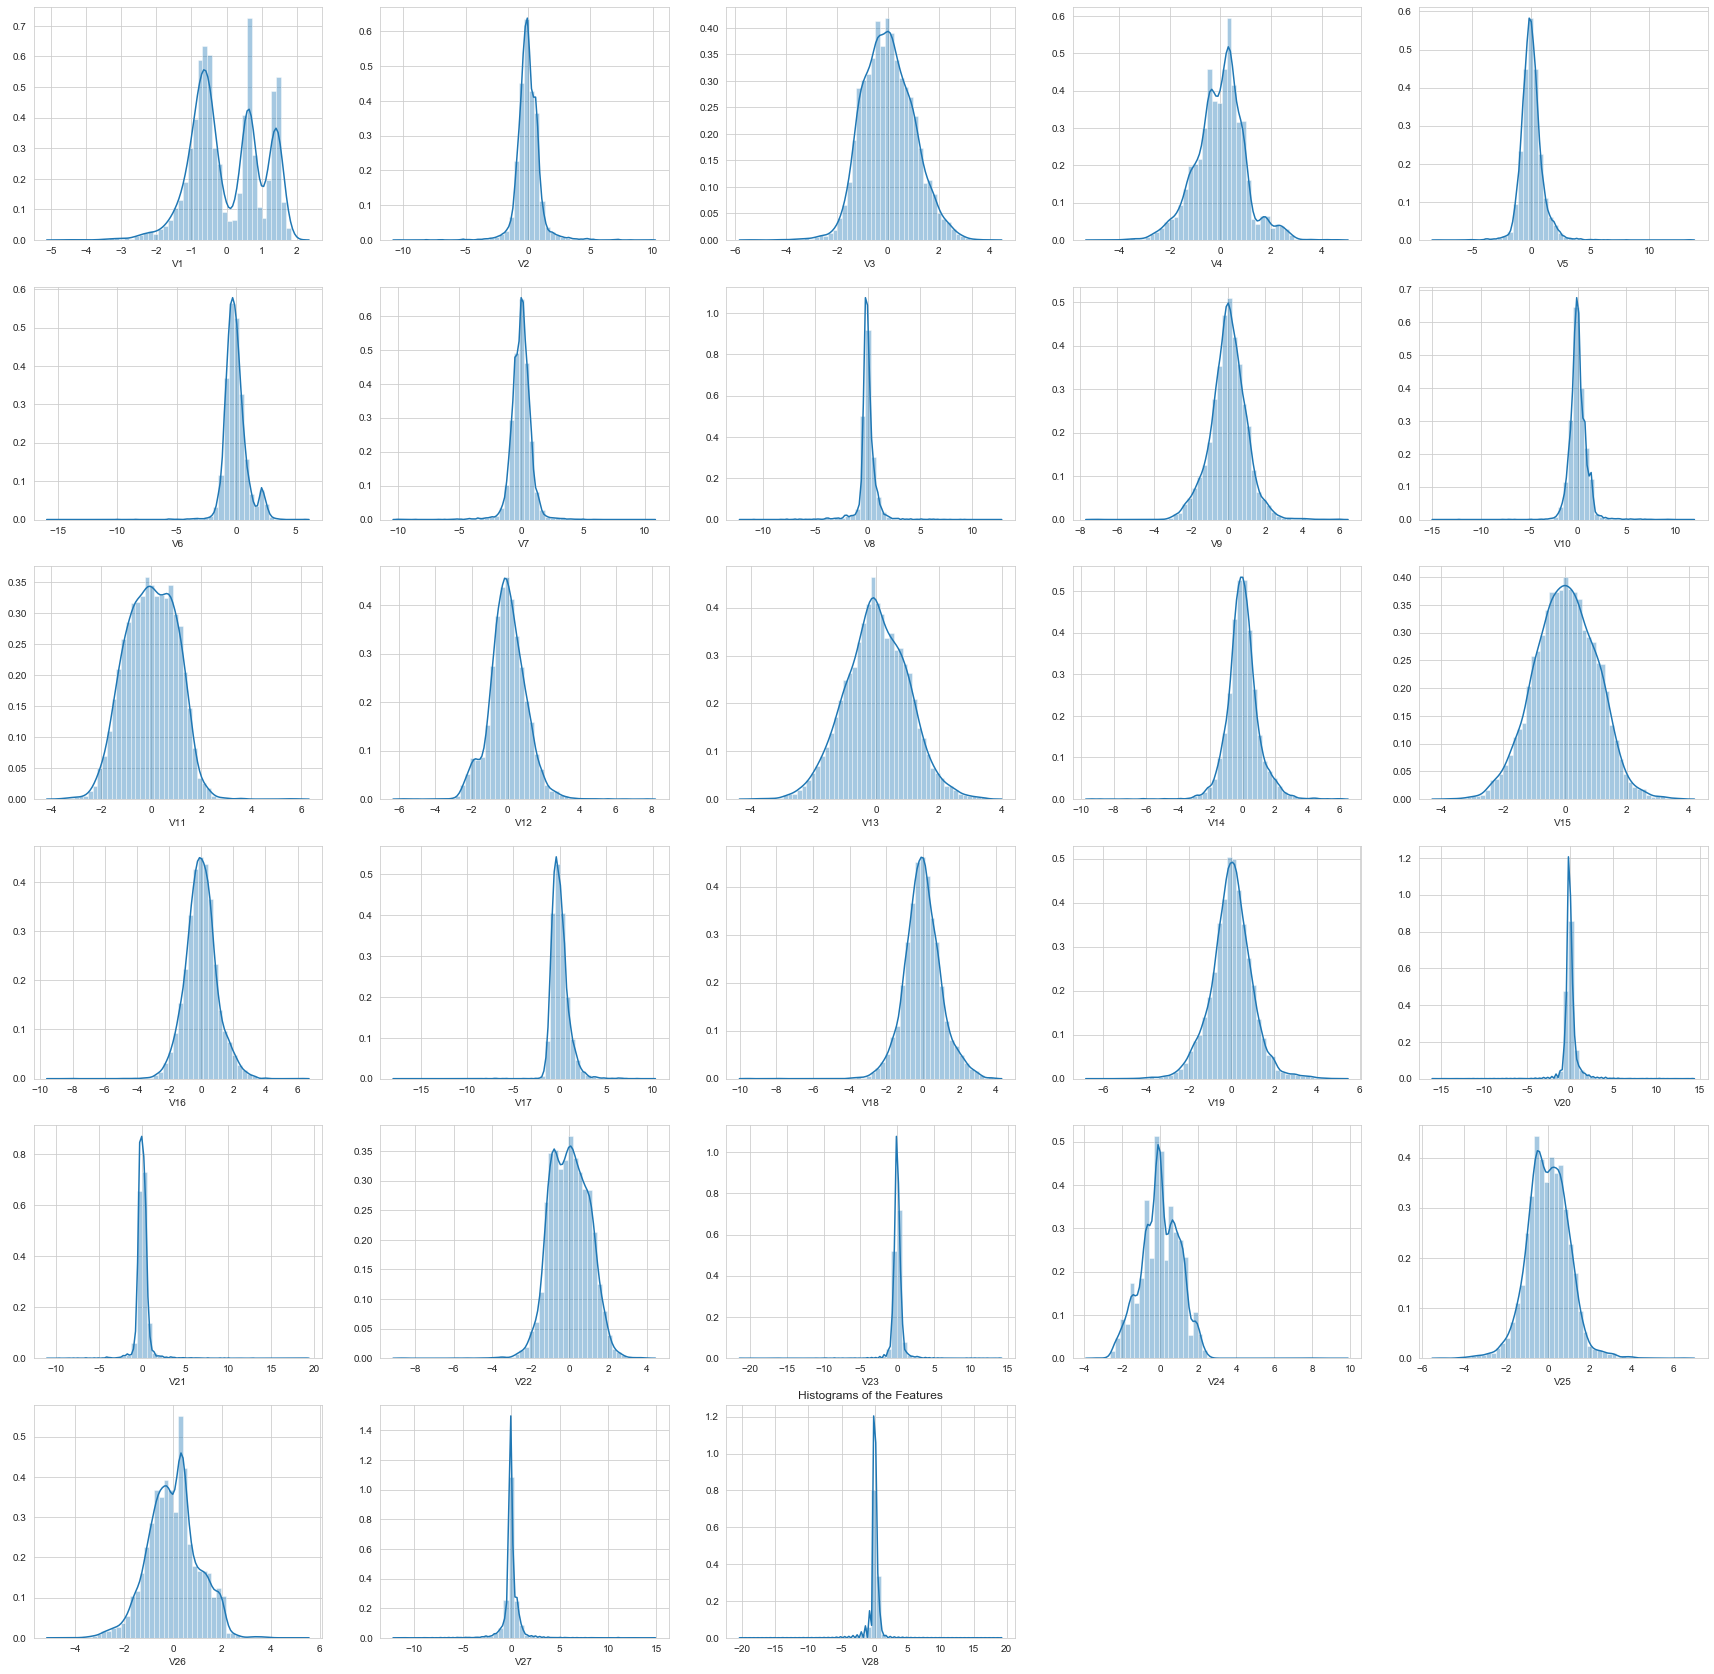

In [59]:
# Plot of X_test dataset
nrows=6
ncols=5
fig, ax = plt.subplots(figsize=(30,30))  
for i in range(len(PCA_Vs)):    
    sp=plt.subplot(nrows,ncols,i+1)
    sns.distplot(X_test[PCA_Vs[i]])
plt.title('Histograms of the Features')

#### <font color='red'>Observation</font>: Much of the skewness is removed from both of the dataset

## Model Building
- Build different models on the imbalanced dataset and see the result

In [60]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = np.logspace(-4, 4, 20)  #--> list of values
cv_num = 10  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [61]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

In [62]:
# Generic Functions
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler


def get_score(model, X, y, n_splits=cv_num):
    skf = StratifiedKFold(n_splits=cv_num, random_state=42, shuffle=False)
    score = []
    for train_index, test_index in skf.split(X_transformed, y_transformed):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train_cv, y_train_cv)
        score.append(model.score(X_test, y_test))
    return score


def plot_ROC(y_pred_incomplete, Y_test_under):
    fpr, tpr, thresholds = roc_curve( Y_test_under, y_pred_incomplete)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


def hyperparam_tuner(model, X_train, y_train, hyperparameters):  
    clf = GridSearchCV(model, hyperparameters, cv=cv_num, verbose=1)
    return clf.fit(X_train, y_train)


def random_oversampler(X, y):
    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, y_over = oversample.fit_resample(X, y)
    return X, y


def smote(X, y):  
#     sm = SMOTE(ratio='minority', random_state=42, kind='borderline1')
    sm = SMOTE(random_state=42)
    X_smote, y_smote = sm.fit_resample(X, y)
    X_smote = pd.DataFrame(X_smote, columns=X.columns)
    y_smote = pd.Series(y_smote)
    return X_smote, y_smote


def adasyn(X, y):  
    ada = ADASYN(random_state=42)
    X_res, y_res = ada.fit_resample(X, y)  
    return X, y

#### Logistic Regression

In [63]:
#perform cross validation
from sklearn.linear_model import LogisticRegression

X_transformed = pd.concat([X_train, X_test], axis=0)
y_transformed = pd.concat([y_train, y_test], axis=0)
score = get_score(LogisticRegression(), X_transformed, y_transformed)

In [64]:
#perform hyperparameter tuning
penalty = ['l1', 'l2']
hyperparameters = dict(C=num_C, penalty=penalty)
best_model = hyperparam_tuner(LogisticRegression(), X_train, y_train, hyperparameters)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   44.0s finished


In [65]:
# Optimum values of hyperparameters
best_model.best_params_

{'C': 0.03359818286283781, 'penalty': 'l2'}

Train Data Plot


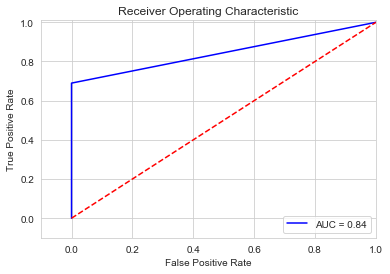

Test Data Plot


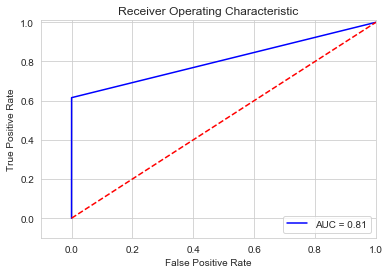

In [66]:
# Evaluation metrics

print("Train Data Plot")
plot_ROC(best_model.predict(X_train), y_train)
print("Test Data Plot")
plot_ROC(best_model.predict(X_test), y_test)

#### Observation: With undersampling, overall performance is not great as test score is less than train score

#### KNN

Start of iteration for k=1 at 2020-06-29 20:59:06
Model fit done for k=1 at 2020-06-29 20:59:06
End of iteration for k=1 at 2020-06-29 20:59:29
Start of iteration for k=2 at 2020-06-29 20:59:29
Model fit done for k=2 at 2020-06-29 20:59:29
End of iteration for k=2 at 2020-06-29 21:00:38
Start of iteration for k=3 at 2020-06-29 21:00:38
Model fit done for k=3 at 2020-06-29 21:00:39
End of iteration for k=3 at 2020-06-29 21:02:00
Start of iteration for k=4 at 2020-06-29 21:02:00
Model fit done for k=4 at 2020-06-29 21:02:00
End of iteration for k=4 at 2020-06-29 21:03:27
Start of iteration for k=5 at 2020-06-29 21:03:27
Model fit done for k=5 at 2020-06-29 21:03:28
End of iteration for k=5 at 2020-06-29 21:04:59
Start of iteration for k=6 at 2020-06-29 21:04:59
Model fit done for k=6 at 2020-06-29 21:04:59
End of iteration for k=6 at 2020-06-29 21:06:34
Start of iteration for k=7 at 2020-06-29 21:06:34
Model fit done for k=7 at 2020-06-29 21:06:34
End of iteration for k=7 at 2020-06-29 2

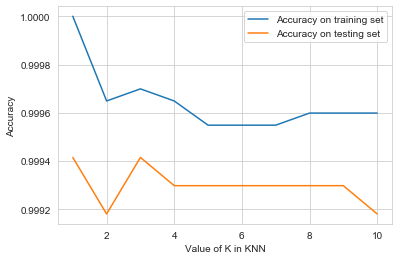

In [67]:
from datetime import datetime
k_range = range(1, 11)
score1=[]
score2=[]
for k in k_range:
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Start of iteration for k={k} at {tm}")
    
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Model fit done for k={k} at {tm}")

    score1.append(knn.score(X_train, y_train))
    score2.append(knn.score(X_test, y_test))
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"End of iteration for k={k} at {tm}")
    
%matplotlib inline
plt.plot(k_range, score1, label= 'Accuracy on training set')
plt.plot(k_range, score2, label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [68]:
# Optimum model score
# Optimum value of k as per the above grapg is 3

best_model=KNeighborsClassifier(n_neighbors=3)
best_model.fit(X_train,y_train)
print('Accuracy of KNN n=3 on the testing dataset is :{:.5f}'.format(best_model.score(X_test,y_test)))

Accuracy of KNN n=3 on the testing dataset is :0.99941


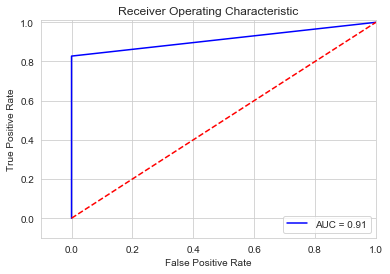

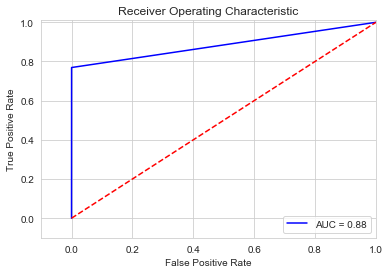

In [69]:
# Performance metrics

plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

#### Observation: The model is performing better than logistic regresion even though its not great as AUC for test datsaet is less compared to that of the train dataset

### Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10,50],
    'max_features': [.5,.7],
    'bootstrap': [False, True],
    'max_depth':[3,6]
}

best_model = hyperparam_tuner(RandomForestClassifier(), X_train, y_train, param_grid)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 27.4min finished


In [71]:
# Optimum values of hyperparameters
best_model.best_params_

{'bootstrap': False, 'max_depth': 6, 'max_features': 0.5, 'n_estimators': 10}

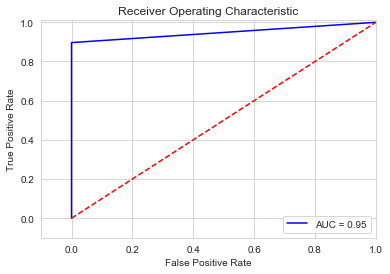

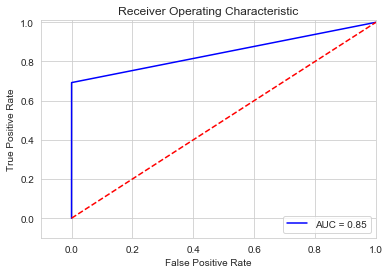

In [72]:
# Performance metrics

plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

#### Observation: Overall perfromance is much better than the previous model. But its still overfitting as test score is much lesser than train score

## Random Over-Sampling

#### Logistic Regression

In [73]:
#perform cross validation
from sklearn.linear_model import LogisticRegression

X_transformed = pd.concat([X_train, X_test], axis=0)
y_transformed = pd.concat([y_train, y_test], axis=0)
X_over, y_over = random_oversampler(X_transformed, y_transformed)
score = get_score(LogisticRegression(), X_over, y_over)
print(score)

[0.9995318899941487, 0.9995318899941487, 0.9994148624926857, 0.9995318899941487, 0.9995318899941487, 0.9995318899941487, 0.9995318899941487, 0.9994148624926857, 0.9994148624926857, 0.9995318899941487]


In [74]:
#perform hyperparameter tuning
penalty = ['l1', 'l2']
hyperparameters = dict(C=num_C, penalty=penalty)
X_train_over, y_train_over = random_oversampler(X_train, y_train)
best_model = hyperparam_tuner(LogisticRegression(), X_train_over, y_train_over, hyperparameters)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   44.6s finished


In [75]:
# Optimum values of hyperparameters
best_model.best_params_

{'C': 0.03359818286283781, 'penalty': 'l2'}

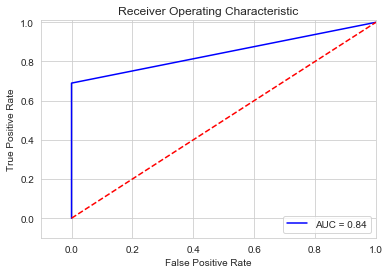

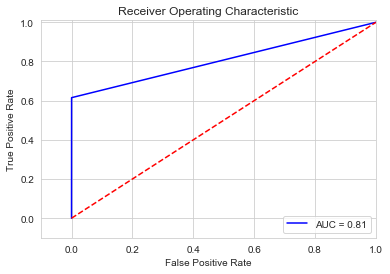

In [76]:
# Performance metrics

plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

#### Observation: 
* Overall performnace is not great even though its better than the normal scenario.
* Model is overfitting as test score is less than the train score


#### KNN

Start of iteration for k=1 at 2020-06-29 21:58:20
Model fit done for k=1 at 2020-06-29 21:58:21
End of iteration for k=1 at 2020-06-29 21:58:43
Start of iteration for k=2 at 2020-06-29 21:58:43
Model fit done for k=2 at 2020-06-29 21:58:44
End of iteration for k=2 at 2020-06-29 21:59:17
Start of iteration for k=3 at 2020-06-29 21:59:17
Model fit done for k=3 at 2020-06-29 21:59:17
End of iteration for k=3 at 2020-06-29 21:59:52
Start of iteration for k=4 at 2020-06-29 21:59:52
Model fit done for k=4 at 2020-06-29 21:59:52
End of iteration for k=4 at 2020-06-29 22:00:30
Start of iteration for k=5 at 2020-06-29 22:00:30
Model fit done for k=5 at 2020-06-29 22:00:30
End of iteration for k=5 at 2020-06-29 22:01:10
Start of iteration for k=6 at 2020-06-29 22:01:10
Model fit done for k=6 at 2020-06-29 22:01:10
End of iteration for k=6 at 2020-06-29 22:01:52
Start of iteration for k=7 at 2020-06-29 22:01:52
Model fit done for k=7 at 2020-06-29 22:01:52
End of iteration for k=7 at 2020-06-29 2

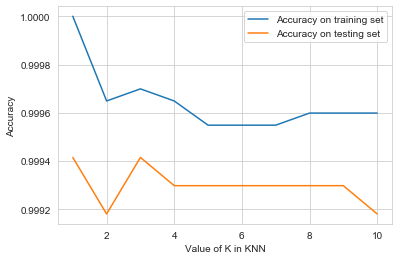

In [77]:
from datetime import datetime
k_range = range(1, 11)
score1=[]
score2=[]
for k in k_range:
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Start of iteration for k={k} at {tm}")
    
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_over,y_train_over)
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Model fit done for k={k} at {tm}")

    score1.append(knn.score(X_train, y_train))
    score2.append(knn.score(X_test, y_test))
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"End of iteration for k={k} at {tm}")
    
%matplotlib inline
plt.plot(k_range, score1, label= 'Accuracy on training set')
plt.plot(k_range, score2, label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [78]:
# Best model parameter

best_model=KNeighborsClassifier(n_neighbors=3)
best_model.fit(X_train_over,y_train_over)
print('Accuracy of KNN n=3 on the testing dataset is :{:.5f}'.format(best_model.score(X_test,y_test)))

Accuracy of KNN n=3 on the testing dataset is :0.99941


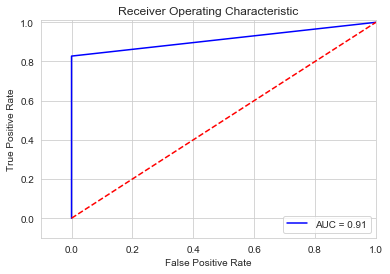

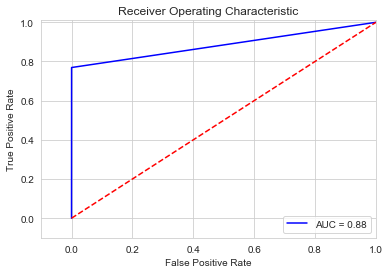

In [79]:
# Performance metrics

plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

#### Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10,50],
    'max_features': [.5,.7],
    'bootstrap': [False, True],
    'max_depth':[3,6]
}

best_model = hyperparam_tuner(RandomForestClassifier(), X_train_over, y_train_over, param_grid)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 11.3min finished


In [81]:
# Optimum values of hyperparameters

best_model.best_params_

{'bootstrap': False, 'max_depth': 6, 'max_features': 0.5, 'n_estimators': 50}

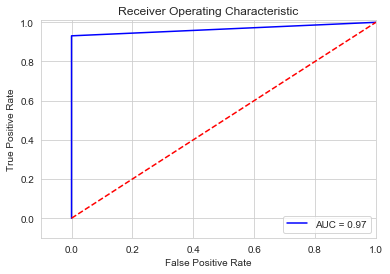

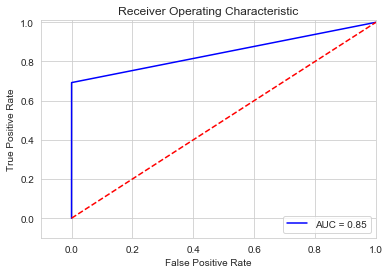

In [82]:
# Performance metrics

plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

#### Observation: 
* Huge difference between train score and test score
* Overall model is overfitting the data

## SMOTE

#### Logistic Regression

In [83]:
#perform cross validation
from sklearn.linear_model import LogisticRegression

X_transformed = pd.concat([X_train, X_test], axis=0)
y_transformed = pd.concat([y_train, y_test], axis=0)
X_smote, y_smote = smote(X_transformed, y_transformed)
score = get_score(LogisticRegression(), X_smote, y_smote)
print(score)

[0.9995318899941487, 0.9995318899941487, 0.9994148624926857, 0.9995318899941487, 0.9995318899941487, 0.9995318899941487, 0.9995318899941487, 0.9994148624926857, 0.9994148624926857, 0.9995318899941487]


In [84]:
#perform hyperparameter tuning
penalty = ['l1', 'l2']
hyperparameters = dict(C=num_C, penalty=penalty)
X_train_smote, y_train_smote = smote(X_train, y_train)
best_model = hyperparam_tuner(LogisticRegression(), X_train_smote, y_train_smote, hyperparameters)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.0min finished


In [85]:
# Optimum values of hyperparameters

best_model.best_params_

{'C': 1438.44988828766, 'penalty': 'l2'}

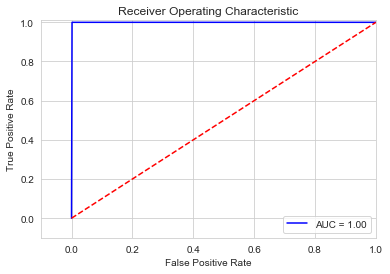

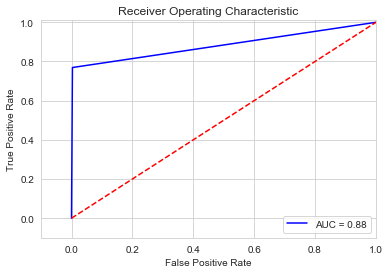

In [86]:
# Peformance metrics

plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

#### Observation:
* Overall score is much higher than the models generated in previous steps
* Model still seems to be overfitting the data as test score is less than the train score and train score is 1

#### KNN

Start of iteration for k=1 at 2020-06-29 22:22:32
Model fit done for k=1 at 2020-06-29 22:22:33
End of iteration for k=1 at 2020-06-29 22:22:45
Start of iteration for k=2 at 2020-06-29 22:22:45
Model fit done for k=2 at 2020-06-29 22:22:45
End of iteration for k=2 at 2020-06-29 22:23:23
Start of iteration for k=3 at 2020-06-29 22:23:23
Model fit done for k=3 at 2020-06-29 22:23:23
End of iteration for k=3 at 2020-06-29 22:24:08
Start of iteration for k=4 at 2020-06-29 22:24:08
Model fit done for k=4 at 2020-06-29 22:24:08
End of iteration for k=4 at 2020-06-29 22:24:58
Start of iteration for k=5 at 2020-06-29 22:24:58
Model fit done for k=5 at 2020-06-29 22:24:59
End of iteration for k=5 at 2020-06-29 22:25:51
Start of iteration for k=6 at 2020-06-29 22:25:51
Model fit done for k=6 at 2020-06-29 22:25:52
End of iteration for k=6 at 2020-06-29 22:26:47
Start of iteration for k=7 at 2020-06-29 22:26:47
Model fit done for k=7 at 2020-06-29 22:26:47
End of iteration for k=7 at 2020-06-29 2

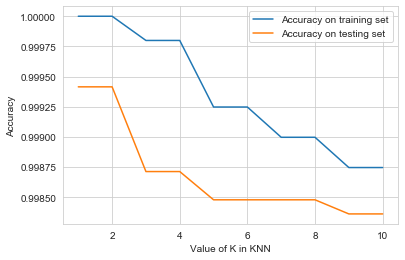

In [87]:
from datetime import datetime
k_range = range(1, 11)
score1=[]
score2=[]
for k in k_range:
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Start of iteration for k={k} at {tm}")
    
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote,y_train_smote)
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Model fit done for k={k} at {tm}")

    score1.append(knn.score(X_train, y_train))
    score2.append(knn.score(X_test, y_test))
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"End of iteration for k={k} at {tm}")
    
%matplotlib inline
plt.plot(k_range, score1, label= 'Accuracy on training set')
plt.plot(k_range, score2, label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [88]:
# Optimum values of hyperparameters

# Optimum value of k is 2
best_model=KNeighborsClassifier(n_neighbors=2)
best_model.fit(X_train_smote,y_train_smote)
print('Accuracy of KNN n=2 on the testing dataset is :{:.5f}'.format(best_model.score(X_test,y_test)))

Accuracy of KNN n=2 on the testing dataset is :0.99941


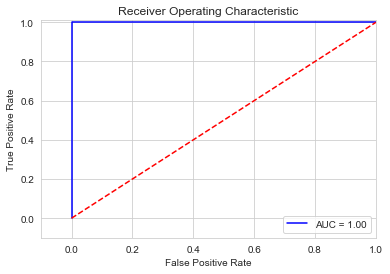

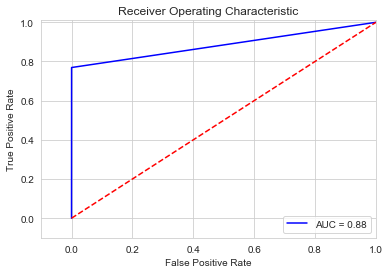

In [89]:
# Performance metrics

plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

#### Observation:
* Overall score is much higher than the models generated in previous steps
* Model still seems to be overfitting the data as test score is less than the train score and train score is 1

#### Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10,50],
    'max_features': [.5,.7],
    'bootstrap': [False, True],
    'max_depth':[3,6]
}

best_model = hyperparam_tuner(RandomForestClassifier(), X_train_smote, y_train_smote, param_grid)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 20.9min finished


In [92]:
# Optimum values of hyperparameters

best_model.best_params_

{'bootstrap': True, 'max_depth': 6, 'max_features': 0.5, 'n_estimators': 10}

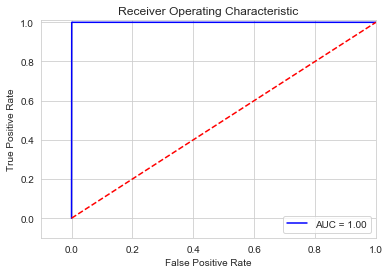

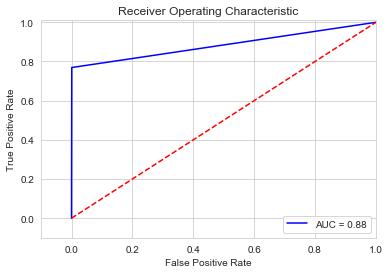

In [93]:
# Performance metrics

plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

#### Observation:
* Overall score is much higher than the models generated in previous steps
* Model still seems to be overfitting the data as test score is less than the train score and train score is 1

## ADASYN

#### Logistic Regression

In [94]:
#perform cross validation
from sklearn.linear_model import LogisticRegression

X_transformed = pd.concat([X_train, X_test], axis=0)
y_transformed = pd.concat([y_train, y_test], axis=0)
X_ada, y_ada = smote(X_transformed, y_transformed)
score = get_score(LogisticRegression(), X_ada, y_ada)
print(score)

[0.9995318899941487, 0.9995318899941487, 0.9994148624926857, 0.9995318899941487, 0.9995318899941487, 0.9995318899941487, 0.9995318899941487, 0.9994148624926857, 0.9994148624926857, 0.9995318899941487]


In [95]:
#perform hyperparameter tuning
penalty = ['l1', 'l2']
hyperparameters = dict(C=num_C, penalty=penalty)
X_train_ada, y_train_ada = adasyn(X_train, y_train)
best_model = hyperparam_tuner(LogisticRegression(), X_train_ada, y_train_ada, hyperparameters)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   28.8s finished


In [96]:
# Optimum values of hyperparameters

best_model.best_params_

{'C': 0.03359818286283781, 'penalty': 'l2'}

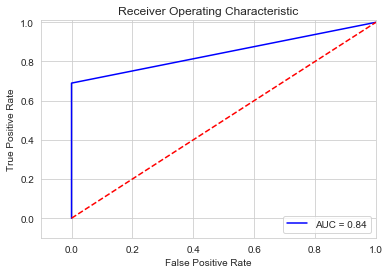

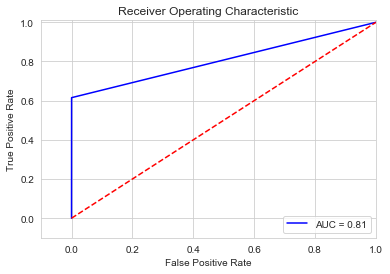

In [97]:
# Performance metrics

plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

#### Observation:
* Overall score is much higher than the models generated in previous steps
* Train and test score is very near to each other signifying characteristics of a good model

#### KNN

Start of iteration for k=1 at 2020-06-29 23:15:22
Model fit done for k=1 at 2020-06-29 23:15:22
End of iteration for k=1 at 2020-06-29 23:15:36
Start of iteration for k=2 at 2020-06-29 23:15:36
Model fit done for k=2 at 2020-06-29 23:15:36
End of iteration for k=2 at 2020-06-29 23:16:10
Start of iteration for k=3 at 2020-06-29 23:16:10
Model fit done for k=3 at 2020-06-29 23:16:10
End of iteration for k=3 at 2020-06-29 23:16:48
Start of iteration for k=4 at 2020-06-29 23:16:48
Model fit done for k=4 at 2020-06-29 23:16:48
End of iteration for k=4 at 2020-06-29 23:17:29
Start of iteration for k=5 at 2020-06-29 23:17:29
Model fit done for k=5 at 2020-06-29 23:17:29
End of iteration for k=5 at 2020-06-29 23:18:13
Start of iteration for k=6 at 2020-06-29 23:18:13
Model fit done for k=6 at 2020-06-29 23:18:13
End of iteration for k=6 at 2020-06-29 23:18:57
Start of iteration for k=7 at 2020-06-29 23:18:57
Model fit done for k=7 at 2020-06-29 23:18:57
End of iteration for k=7 at 2020-06-29 2

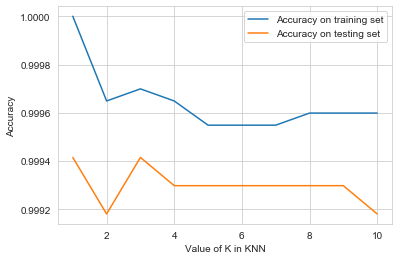

In [98]:
from datetime import datetime
k_range = range(1, 11)
score1=[]
score2=[]
for k in k_range:
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Start of iteration for k={k} at {tm}")
    
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_ada,y_train_ada)
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Model fit done for k={k} at {tm}")

    score1.append(knn.score(X_train, y_train))
    score2.append(knn.score(X_test, y_test))
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"End of iteration for k={k} at {tm}")
    
%matplotlib inline
plt.plot(k_range, score1, label= 'Accuracy on training set')
plt.plot(k_range, score2, label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [99]:
# Optimum values of hyperparameters

# Optimum value of k is 3
best_model=KNeighborsClassifier(n_neighbors=3)
best_model.fit(X_train_smote,y_train_smote)
print('Accuracy of KNN n=3 on the testing dataset is :{:.5f}'.format(best_model.score(X_test,y_test)))

Accuracy of KNN n=3 on the testing dataset is :0.99871


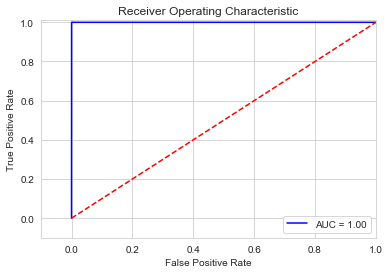

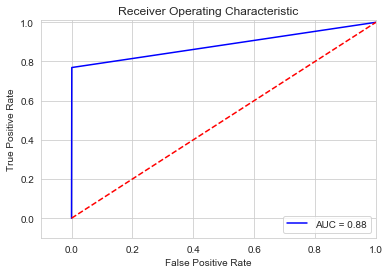

In [100]:
# Performance metrics

plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

#### Observation:
* Overall score is much higher than the models generated in previous steps
* Model still seems to be overfitting the data as test score is less than the train score and train score is 1

#### Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10,50],
    'max_features': [.5,.7],
    'bootstrap': [False, True],
    'max_depth':[3,6]
}

best_model = hyperparam_tuner(RandomForestClassifier(), X_train_ada, y_train_ada, param_grid)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 13.1min finished


In [102]:
# Optimum values of hyperparameters

best_model.best_params_

{'bootstrap': False, 'max_depth': 6, 'max_features': 0.5, 'n_estimators': 50}

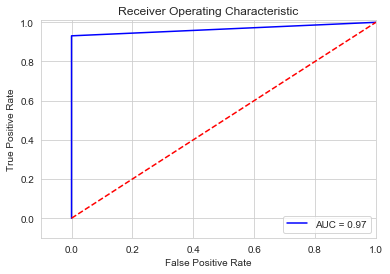

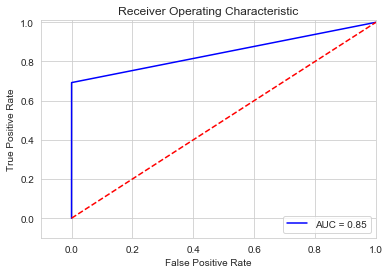

In [103]:
# Performance metrics

plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

#### <font color='red'>Generic Observations:</font>
* Overall both oversampling and normal scenarion data didnt generate any good model 
* Both SMOTE and ADASYN performed better compared to the other 2 scenarios

#### <font color='red'>Model Observations:</font>
* KNN and Random Forest performed better than Logistic regression

#### <font color='red'>Best Model:</font>
* Based on the sample data used for the modelling the performing seems to be -- All the models with SMOTE and ADASYN
* Best model can change and be decided more precisely if it is executed with full volume of data